In [13]:
import numpy as np

n = 10000
coins = ['HH', 'HT', 'TT']
coins_selected = np.random.choice(coins,n)
first_side_shown = np.array([c[np.random.random_integers(0,1,1)[0]] for c in coins_selected])
coins_with_heads = coins_selected[np.where(first_side_shown == 'H')[0]]
second_side_shown = np.array([c[np.random.random_integers(0,1,1)[0]] for c in coins_with_heads])
print("%s/%s"%(np.where(second_side_shown=='H')[0].size,second_side_shown.size))
print(np.where(second_side_shown=='H')[0].size/second_side_shown.size)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  


4140/4998
0.8283313325330132


In [1]:
# prob mass function is for discrete distributions 
# prob density function is for continuous distributions

In [41]:
# statistical inference
# simulating data

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

n = 100
pcoin = 0.62 # actual value of p for coin
results = st.bernoulli(pcoin).rvs(n)
h = sum(results)
print("We observed %s heads out of %s"%(h,n))

# null hypothesis

p = 0.5
rv = st.binom(n,p)
mu = rv.mean()
sd = rv.std()
print("The expected distribution for a fair coin is mu=%s, sd=%s"%(mu,sd))

# binomial distribution

print("binomial test p-value: %s"%st.binom_test(h, n, p))

# z test

z = (h-0.5-mu)/sd
print("normal approximation p-value: - %s"%(2*(1 - st.norm.cdf(z))))

# permutation test

nsamples = 100000
xs = np.random.binomial(n, p, nsamples)
print("simulation p-value - %s"%(2*np.sum(xs >= h)/(xs.size + 0.0)))

# Maximum Likelihood Estimation (MLE)

bs_samples = np.random.choice(results, (nsamples, len(results)), replace=True)
bs_ps = np.mean(bs_samples, axis=1)
bs_ps.sort()

print("Maximum Likelihood Estimate: %s"%(np.sum(results)/float(len(results))))
print("Bootstrap CI: (%.4f, %.4f)" % (bs_ps[int(0.025*nsamples)], bs_ps[int(0.975*nsamples)]))

# bayesian Esstamition

fig  = plt.figure()
ax = fig.add_subplot(111)

a, b = 10, 10
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)
map_ =(h+a-1.0)/(n+a+b-2.0)

xs = np.linspace(0, 1, 100)
ax.plot(prior.pdf(xs), label='Prior')
ax.plot(post.pdf(xs), label='Posterior')
ax.axvline(mu, c='red', linestyle='dashed', alpha=0.4)
ax.set_xlim([0, 100])
ax.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
ax.axvline(n*map_, c='blue', linestyle='dashed', alpha=0.4)
ax.legend()
plt.savefig("coin-toss.png")

We observed 66 heads out of 100
The expected distribution for a fair coin is mu=50.0, sd=5.0
binomial test p-value: 0.00178993039149
normal approximation p-value: - 0.00193520642644
simulation p-value - 0.00192
Maximum Likelihood Estimate: 0.66
Bootstrap CI: (0.5700, 0.7500)


We observed 68 heads out of 100
The expected distribution for a fair coin is mu=50.0, sd=5.0
binomial test p-value: 0.000408777167427
normal approximation p-value: - 0.000465258158071
simulation p-value - 0.00036
Maximum Likelihood Estimate: 0.68
Bootstrap CI: (0.5900, 0.7700)


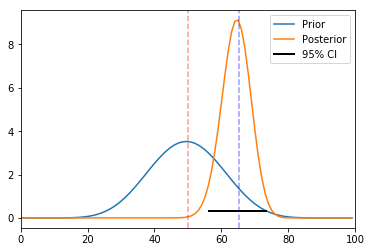

In [44]:
# statistical inference
# simulating data

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

n = 100
pcoin = 0.62 # actual value of p for coin
results = st.bernoulli(pcoin).rvs(n)
h = sum(results)
print("We observed %s heads out of %s"%(h,n))

# null hypothesis

p = 0.5
rv = st.binom(n,p)
mu = rv.mean()
sd = rv.std()
print("The expected distribution for a fair coin is mu=%s, sd=%s"%(mu,sd))

# binomial distribution

print("binomial test p-value: %s"%st.binom_test(h, n, p))

# z test

z = (h-0.5-mu)/sd
print("normal approximation p-value: - %s"%(2*(1 - st.norm.cdf(z))))

# permutation test

nsamples = 100000
xs = np.random.binomial(n, p, nsamples)
print("simulation p-value - %s"%(2*np.sum(xs >= h)/(xs.size + 0.0)))

# Maximum Likelihood Estimation (MLE)

bs_samples = np.random.choice(results, (nsamples, len(results)), replace=True)
bs_ps = np.mean(bs_samples, axis=1)
bs_ps.sort()

print("Maximum Likelihood Estimate: %s"%(np.sum(results)/float(len(results))))
print("Bootstrap CI: (%.4f, %.4f)" % (bs_ps[int(0.025*nsamples)], bs_ps[int(0.975*nsamples)]))

# bayesian estamition

fig  = plt.figure()
ax = fig.add_subplot(111)

a, b = 10, 10
prior = st.beta(a, b)
post = st.beta(h+a, n-h+b)
ci = post.interval(0.95)
map_ =(h+a-1.0)/(n+a+b-2.0)

xs = np.linspace(0, 1, 100)
ax.plot(prior.pdf(xs), label='Prior')
ax.plot(post.pdf(xs), label='Posterior')
ax.axvline(mu, c='red', linestyle='dashed', alpha=0.4)
ax.set_xlim([0, 100])
ax.axhline(0.3, ci[0], ci[1], c='black', linewidth=2, label='95% CI');
ax.axvline(n*map_, c='blue', linestyle='dashed', alpha=0.4)
ax.legend()
plt.savefig("coin-toss.png")

plt.show()


In [46]:
# linear regression

import matplotlib.pyplot as plt
import numpy as np

def get_simple_regression_samples(n,b0=-0.3,b1=0.5,error=0.2):
    trueX =  np.random.uniform(-1,1,n)
    trueT = b0 + (b1*trueX)
    return np.array([trueX]).T, trueT + np.random.normal(0,error,n)

seed = 42
n = 20
b0_true = -0.3
b1_true = 0.5
x,y = get_simple_regression_samples(n,b0=b0_true,b1=b1_true,seed=seed)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(x[:,0],y,'ko')
ax.plot(x[:,0], b0_true + x[:,0]*b1_true,color='black',label='model mean')
ax.legend()
plt.show()

TypeError: get_simple_regression_samples() got an unexpected keyword argument 'seed'

In [47]:
import numpy as np
import scipy

def fit_linear_lstsq(xdata,ydata):
    """
    y = b0 + b1*x
    """
    matrix = []
    n,d = xdata.shape
    for i in range(n):
        matrix.append([1.0, xdata[i,0]])
    return scipy.linalg.basic.lstsq(matrix,ydata)[0]

coefs_lstsq = fit_linear_lstsq(x,y)
y_pred_lstsq = coefs_lstsq[0] + (coefs_lstsq[1]*x[:,0])

print("truth: b0=%s,b1=%s"%(b0_true,b1_true))
print("lstsq fit: b0=%s,b1=%s"%(round(coefs_lstsq[0],3),round(coefs_lstsq[1],3)))

NameError: name 'x' is not defined